Notebook for https://github.com/leferrad/pyoselm

In [209]:
from pyoselm import OSELMRegressor, OSELMClassifier
from sklearn.datasets import load_digits, make_regression 
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing

import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [210]:
path = "../datasets/"


In [211]:
def LeferradOSELM(batch,X,y):
    n_batch = batch
    oselmr = OSELMRegressor(n_hidden=batch, activation_func='sigmoid', random_state=123)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    p = math.ceil(len(X_train)/n_batch) 
    
    for i in range(p):
        X_batch = X_train[i*n_batch:(i+1)*n_batch]
        y_batch = y_train[i*n_batch:(i+1)*n_batch]
        if(len(X_batch) == 0):
            continue
        oselmr.fit(X_batch, y_batch)
        #print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))
    
    pred = oselmr.predict(X)
    return r2_score(y, pred)

14015 3504 17519
Train score of total: 0.6384373362224651
Test score of total: 0.6242110675634115

R2 = 0.6355984718420151


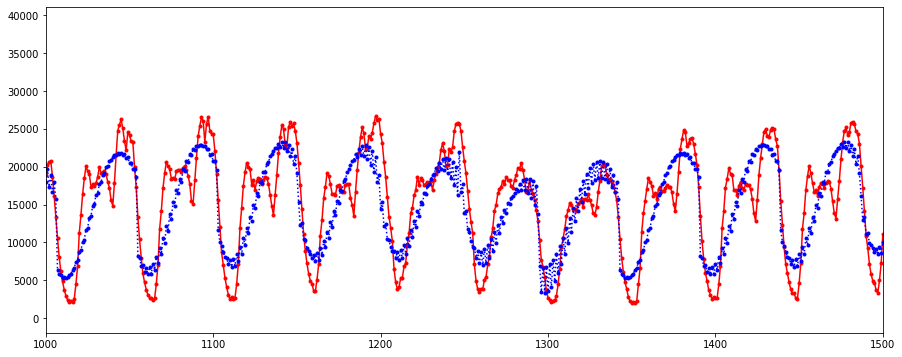

In [215]:
#NYC DATASET

dataset = "nyc_taxi.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])


raw["hour"] = [t.hour for t in pd.DatetimeIndex(raw.timestamp)]
raw["minute"] = [t.minute for t in pd.DatetimeIndex(raw.timestamp)]
raw["day"] = [t.dayofweek for t in pd.DatetimeIndex(raw.timestamp)]
raw["month"] = [t.month for t in pd.DatetimeIndex(raw.timestamp)]
raw['year'] = [t.year for t in pd.DatetimeIndex(raw.timestamp)]
raw.drop(['timestamp'],inplace=True,axis=1)

data = raw.to_numpy()
X = data[:,1:]
y = data[:,:1]

oselmr = OSELMRegressor(n_hidden=50, activation_func='sigmoid', random_state=123)


min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

n_batch = 900

# Fit model with chunks of data
for i in range( math.ceil(len(X_train)/n_batch) ):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    #print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
#print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.xlim([1000,1500])

#print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
#print("MAPE =",mean_absolute_percentage_error(y, pred))

In [142]:
#NYC DATASET WITH VARIYIN BATCH SIZES
batches = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

dataset = "nyc_taxi.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])


raw["hour"] = [t.hour for t in pd.DatetimeIndex(raw.timestamp)]
raw["minute"] = [t.minute for t in pd.DatetimeIndex(raw.timestamp)]
raw["day"] = [t.dayofweek for t in pd.DatetimeIndex(raw.timestamp)]
raw["month"] = [t.month for t in pd.DatetimeIndex(raw.timestamp)]
raw['year'] = [t.year for t in pd.DatetimeIndex(raw.timestamp)]
raw.drop(['timestamp'],inplace=True,axis=1)

data = raw.to_numpy()
X = data[:,1:]
y = data[:,:1]

nb = []
r2 = []

for b in batches:
    r2.append(LeferradOSELM(b,X,y))
    nb.append(b)

Text(0.5, 1.0, 'R2 Score vs Batch training size on NYC Taxi Dataset')

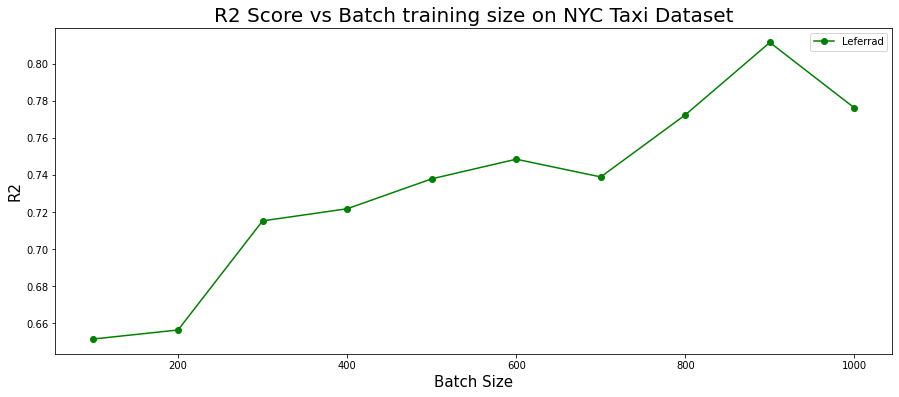

In [153]:
plt.figure(figsize=(15,6))
r2Plot,=plt.plot(nb,r2,label='Leferrad',color='green',marker='o')
plt.ylabel('R2',fontsize=15)
plt.xlabel('Batch Size',fontsize=15)
#predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.legend(handles=[r2Plot])
plt.title("R2 Score vs Batch training size on NYC Taxi Dataset",fontsize=20,fontweight=40)

3340 836 4176
Train score of total: 0.9794611394464054
Test score of total: 0.980916054580788

4176
MSRE = 0.014122542487214434
R2 = 0.979747769452269
MAPE = 0.025858371720804102


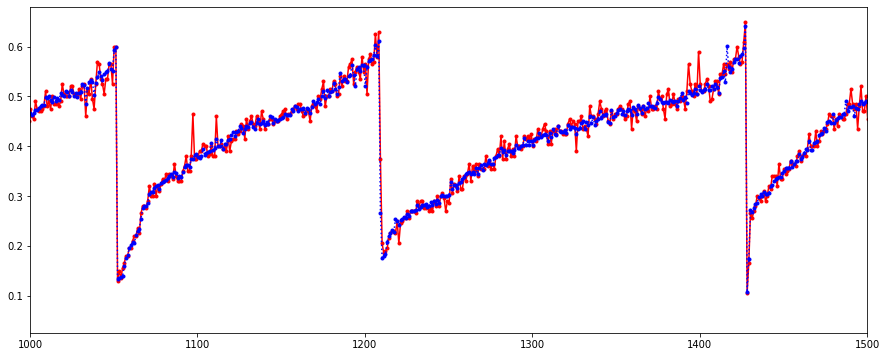

In [200]:
#AbALONE DATASET

dataset = "Abalone.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])
map = {'M':0,'F':1,'I':2}
raw = raw.replace({'sex':map})

#PREDECIR DIAMETRO
r = raw.diameter
raw = raw.drop(['diameter'], axis=1)

X = raw.to_numpy()
y = r.to_numpy()


oselmr = OSELMRegressor(n_hidden=88, activation_func='sigmoid', random_state=123)

min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

n_batch = 88

# Fit model with chunks of data
for i in range(38):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    #print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.xlim([1000,1500])

print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))

Text(0.5, 1.0, 'R2 Score vs Batch training size on Abalone Dataset')

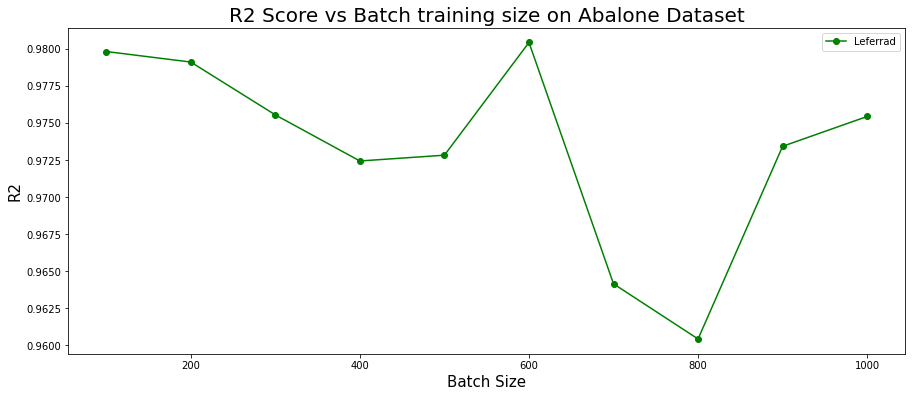

In [167]:
nb = []
r2 = []

for b in batches:
    r2.append(LeferradOSELM(b,X,y))
    nb.append(b)
    
plt.figure(figsize=(15,6))
r2Plot,=plt.plot(nb,r2,label='Leferrad',color='green',marker='o')
plt.ylabel('R2',fontsize=15)
plt.xlabel('Batch Size',fontsize=15)
#predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.legend(handles=[r2Plot])
plt.title("R2 Score vs Batch training size on Abalone Dataset",fontsize=20,fontweight=40)

,High,Low,Close,Volume,year
0,333.87,329.08,666.45,5749400,2012
1,330.75,326.89,657.21,6590300,2012
2,328.77,323.68,648.24,5405900,2012
3,322.29,309.46,620.76,11688800,2012
4,315.72,307.30,621.43,8824000,2012
...,...,...,...,...,...
1252,792.74,787.28,789.91,623400,2016
1253,797.86,787.66,791.55,789100,2016
1254,794.23,783.20,785.05,1153800,2016
1255,785.93,778.92,782.79,744300,2016


1005 252 1257
Train score for batch 1: 0.999946544503703
Train score for batch 2: 0.9998361518217824
Train score for batch 3: 0.9998058672850987
Train score for batch 4: 0.9997180220032809
Train score for batch 5: 0.9996329012188214
Train score for batch 6: 0.9997858888754058
Train score for batch 7: 0.9997350289511682
Train score for batch 8: 0.9997756132016528
Train score for batch 9: 0.9994166077362634
Train score for batch 10: 0.9997900620307182
Train score for batch 11: 0.9998130805875773
Train score of total: 0.9997008469234356
Test score of total: 0.9996921782805324

1257
MSRE = 2.6326541542904667
R2 = 0.9996991857963436
MAPE = 0.0037340751624261384


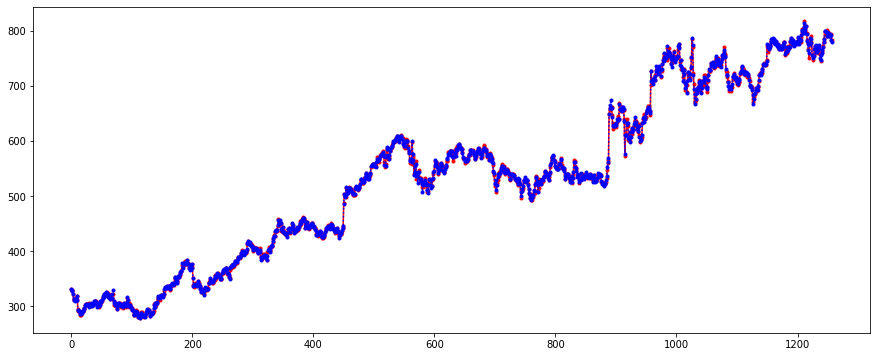

In [201]:
#GOOGLE DATASET
dataset = "Google_Stock_Price_Train.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])

raw["day"] = [t.day for t in pd.DatetimeIndex(raw.Date)]
raw["month"] = [t.month for t in pd.DatetimeIndex(raw.Date)]
raw['year'] = [t.year for t in pd.DatetimeIndex(raw.Date)]
raw.drop(['Date',"day","month"],inplace=True,axis=1)

raw['Volume'] = raw['Volume'].str.replace(',', '')
#raw['Open'] = raw['Open'].str.replace(',', '')
#raw['High'] = raw['High'].str.replace(',', '')
raw['Close'] = raw['Close'].str.replace(',', '')
#raw['Low'] = raw['Low'].str.replace(',', '')

#PREDECIR EL OPEN

y = raw.Open.to_numpy()
raw.drop(['Open'],inplace=True,axis=1)
X = raw.to_numpy()
display(raw)

n_batch = 100

oselmr = OSELMRegressor(n_hidden=n_batch, activation_func='sigmoid', random_state=123)

min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))



# Fit model with chunks of data
for i in range(11):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')

print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))

Text(0.5, 1.0, 'R2 Score vs Batch training size on Google Stock Dataset')

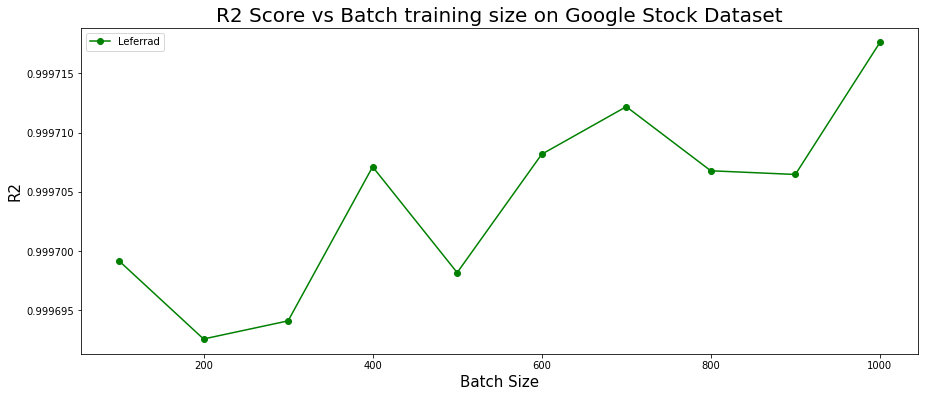

In [158]:
nb = []
r2 = []

for b in batches:
    r2.append(LeferradOSELM(b,X,y))
    nb.append(b)
    
plt.figure(figsize=(15,6))
r2Plot,=plt.plot(nb,r2,label='Leferrad',color='green',marker='o')
plt.ylabel('R2',fontsize=15)
plt.xlabel('Batch Size',fontsize=15)
#predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.legend(handles=[r2Plot])
plt.title("R2 Score vs Batch training size on Google Stock Dataset",fontsize=20,fontweight=40)

In [159]:
#import seaborn as sn
#corrMatrix = raw.corr()
#sn.heatmap(corrMatrix, annot=True)
#plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


317 80 397
Train score for batch 1: 0.99999999999995
Train score for batch 2: 0.9587034541682931
Train score for batch 3: 0.971438777989388
Train score for batch 4: 0.972801402808598
Train score for batch 5: 0.9355601883981133
Train score for batch 6: 0.9552203509745067
Train score of total: 0.9503639614694837
Test score of total: 0.8885622044255197

397
MSRE = 9.522259780159292
R2 = 0.9385451613490238
MAPE = 0.06818735629038451


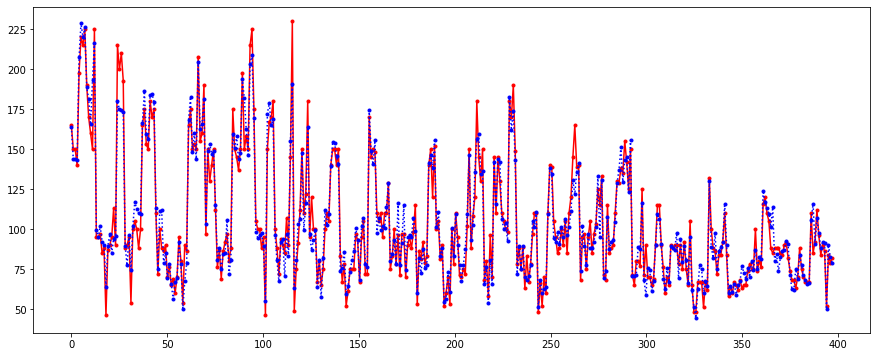

In [202]:
dataset = "auto-mpg.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])

display(raw)

y = raw["horsepower"].to_numpy()
raw.drop(["car name","horsepower"],inplace=True,axis=1)
X = raw.to_numpy()

n_batch = 50

oselmr = OSELMRegressor(n_hidden=n_batch, activation_func='sigmoid', random_state=123)

min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

# Fit model with chunks of data
for i in range(6):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')

print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))

Text(0.5, 1.0, 'R2 Score vs Batch training size on Auto MPG Dataset')

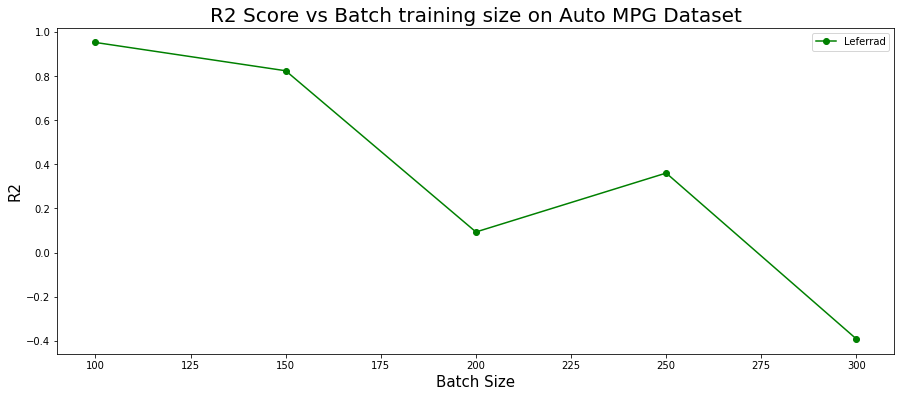

In [173]:
nb = []
r2 = []
batches = [100,150,200,250,300]

for b in batches:
    r2.append(LeferradOSELM(b,X,y))
    nb.append(b)
    
plt.figure(figsize=(15,6))
r2Plot,=plt.plot(nb,r2,label='Leferrad',color='green',marker='o')
plt.ylabel('R2',fontsize=15)
plt.xlabel('Batch Size',fontsize=15)
#predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.legend(handles=[r2Plot])
plt.title("R2 Score vs Batch training size on Auto MPG Dataset",fontsize=20,fontweight=40)

358 90 448
Train score for batch 1: 0.9999991885594592
Train score for batch 2: 0.9999958135133524
Train score for batch 3: 0.9999842794099566
Train score for batch 4: 0.9999773469587083
Train score for batch 5: 0.9999838924946988
Train score for batch 6: 0.9999721953865662
Train score of total: 0.9999774913592795
Test score of total: 0.9999756320550173

448


,deaths,recovered,day,month,year
0,0,0,23,1,2020
1,0,0,24,1,2020
2,0,0,25,1,2020
3,0,0,26,1,2020
4,0,0,27,1,2020
...,...,...,...,...,...
443,24213,998400,10,4,2021
444,24346,1005860,11,4,2021
445,24483,1012904,12,4,2021
446,24518,1020925,13,4,2021


MSRE = 1473.9382002391633
R2 = 0.9999771609168633
MAPE = 1.3611800796706523e+17


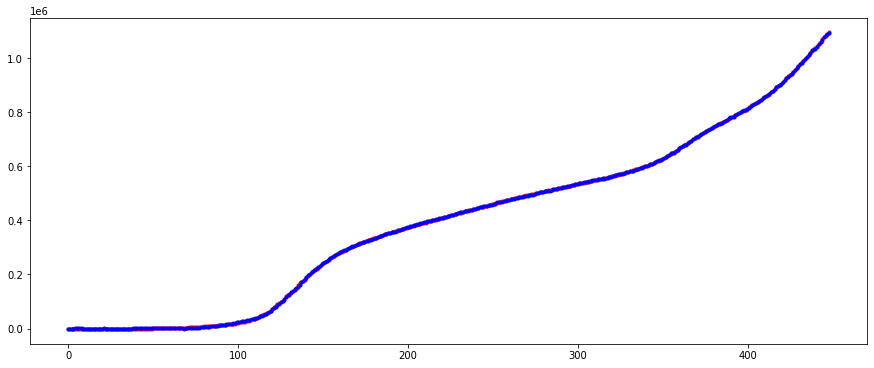

In [203]:
#COVID DATASET
dataset = "covid_chile.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])
raw["day"] = [t.day for t in pd.DatetimeIndex(raw.date)]
raw["month"] = [t.month for t in pd.DatetimeIndex(raw.date)]
raw['year'] = [t.year for t in pd.DatetimeIndex(raw.date)]


y = raw["confirmed"].to_numpy()
raw.drop(["date","confirmed"],inplace=True,axis=1)
X = raw.to_numpy()

n_batch = 60

oselmr = OSELMRegressor(n_hidden=n_batch, activation_func='sigmoid', random_state=123)


min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

# Fit model with chunks of data
for i in range(6):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')

display(raw)
print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))

Text(0.5, 1.0, 'R2 Score vs Batch training size on COVID Dataset')

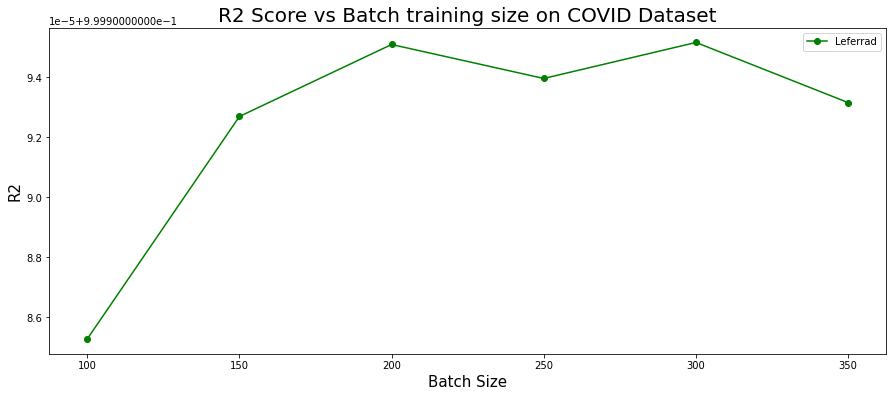

In [176]:
nb = []
r2 = []
batches = [100,150,200,250,300,350]

for b in batches:
    r2.append(LeferradOSELM(b,X,y))
    nb.append(b)
    
plt.figure(figsize=(15,6))
r2Plot,=plt.plot(nb,r2,label='Leferrad',color='green',marker='o')
plt.ylabel('R2',fontsize=15)
plt.xlabel('Batch Size',fontsize=15)
#predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.legend(handles=[r2Plot])
plt.title("R2 Score vs Batch training size on COVID Dataset",fontsize=20,fontweight=40)

16345 4087 20432
Train score for batch 1: 0.939218542835092
Train score for batch 2: 0.9000227304453462
Train score for batch 3: 0.8353151594657476
Train score for batch 4: 0.8233743280803821
Train score for batch 5: 0.8383666237532658
Train score for batch 6: 0.8125910621244257
Train score for batch 7: 0.8063963905253739
Train score for batch 8: 0.8267137761865981
Train score for batch 9: 0.7988337770419125
Train score for batch 10: 0.8145244973411315
Train score for batch 11: 0.7941857598186011
Train score for batch 12: 0.8006204161778456
Train score for batch 13: 0.8171393791969421
Train score for batch 14: 0.8064876683271163
Train score for batch 15: 0.7904874193691623
Train score for batch 16: 0.82793393656805
Train score for batch 17: 0.8387682481892358
Train score for batch 18: 0.7981883848599212
Train score for batch 19: 0.8235382981820177
Train score for batch 20: 0.7812232985333265
Train score for batch 21: 0.7882770186073051
Train score for batch 22: 0.8006873179866257
Train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0
...,...,...,...,...,...,...,...,...,...
20427,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,2
20428,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,2
20429,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,2
20430,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,2


MSRE = 54362.192313094056
R2 = 0.7781751332208047
MAPE = 0.21082348390539649


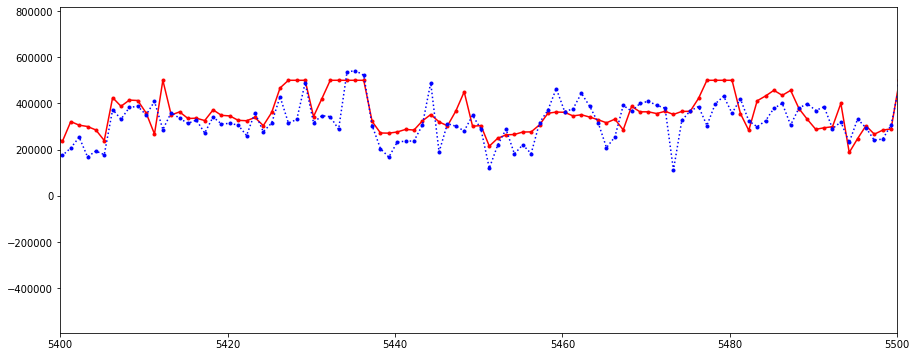

In [204]:
#HS DATASET
dataset = "hs.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])
m = {'NEAR BAY':0,'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'ISLAND':4}
raw = raw.replace({'ocean_proximity':m})

y = raw["median_house_value"].to_numpy()
raw.drop(["median_house_value"],inplace=True,axis=1)
X = raw.to_numpy()

n_batch = 500

oselmr = OSELMRegressor(n_hidden=n_batch, activation_func='sigmoid', random_state=123)


min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

# Fit model with chunks of data
for i in range(33):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.xlim([5400,5500])
display(raw)

print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))

Text(0.5, 1.0, 'R2 Score vs Batch training size on HS Dataset')

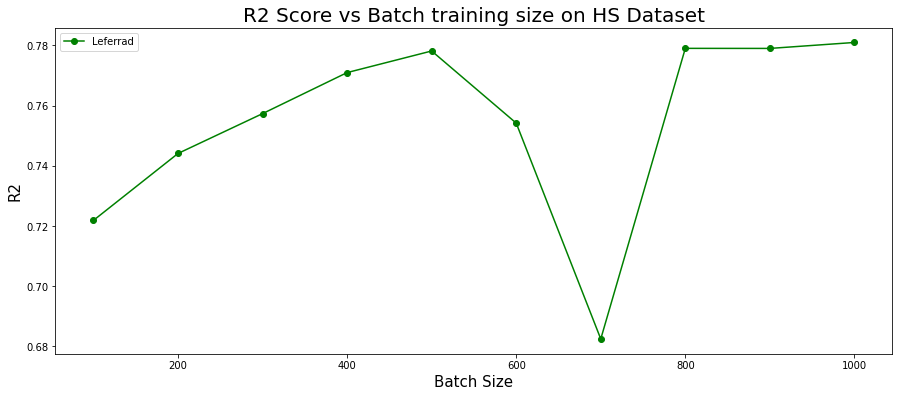

In [179]:
nb = []
r2 = []
batches = [100,200,300,400,500,600,700,800,900,1000]

for b in batches:
    r2.append(LeferradOSELM(b,X,y))
    nb.append(b)
    
plt.figure(figsize=(15,6))
r2Plot,=plt.plot(nb,r2,label='Leferrad',color='green',marker='o')
plt.ylabel('R2',fontsize=15)
plt.xlabel('Batch Size',fontsize=15)
#predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.legend(handles=[r2Plot])
plt.title("R2 Score vs Batch training size on HS Dataset",fontsize=20,fontweight=40)

1600 400 2000
Train score for batch 1: 0.12648350973825262
Train score for batch 2: 0.018200524969813836
Train score for batch 3: 0.035016070985149694
Train score for batch 4: 0.04009984550809664
Train score for batch 5: 0.08766160334854967
Train score for batch 6: 0.0510788862319409
Train score for batch 7: 0.02699374503870733
Train score for batch 8: 0.051459712158540394
Train score for batch 9: 0.026847397604303214
Train score for batch 10: 0.008742735574524874
Train score of total: 0.03383043944205022
Test score of total: -0.0033733519808500922

2000


,angle
0,0.000000
1,0.050021
2,0.100042
3,0.150063
4,0.200083
...,...
1995,99.791580
1996,99.841601
1997,99.891622
1998,99.941642


MSRE = 0.6967669554032986
R2 = 0.0277518203745587
MAPE = 985757955105.8112


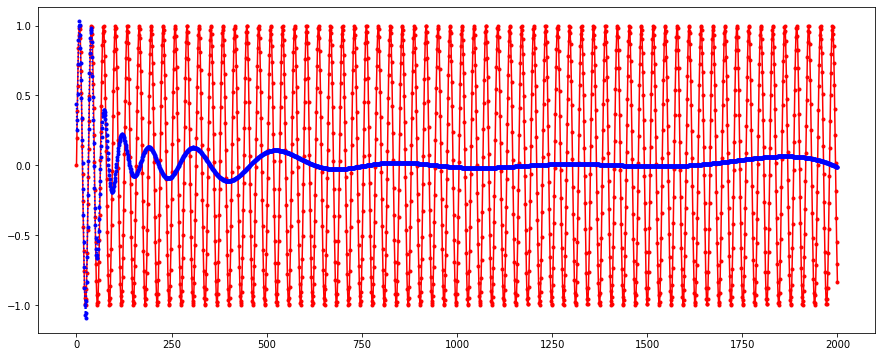

In [205]:
#SINE DATASET
dataset = "sine.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1,2])


y = raw["data"].to_numpy()
raw.drop(["data"],inplace=True,axis=1)
X = raw.to_numpy()

n_batch = 160

oselmr = OSELMRegressor(n_hidden=n_batch, activation_func='sigmoid', random_state=123)

#min_max_scaler = preprocessing.MinMaxScaler()

#X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

# Fit model with chunks of data
for i in range(10):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
#plt.xlim([5400,5500])
display(raw)

print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))

8708 2177 10885
Train score for batch 1: 0.999765769383454
Train score for batch 2: 0.8098612738389712
Train score for batch 3: 0.7402327037343224
Train score for batch 4: 0.6325267901700484
Train score for batch 5: 0.6070856457579288
Train score for batch 6: 0.6079005804393204
Train score for batch 7: 0.6445847029162004
Train score for batch 8: 0.6707129932833189
Train score for batch 9: 0.5682780100320701
Train score for batch 10: 0.6200699691027303
Train score for batch 11: 0.6489055541626673
Train score for batch 12: 0.6278111242317362
Train score for batch 13: 0.6141561011822116
Train score for batch 14: 0.6263255874660298
Train score for batch 15: 0.5555320444645355
Train score for batch 16: 0.5652012731931237
Train score for batch 17: 0.6472597805177118
Train score for batch 18: 0.5595538935660672
Train score for batch 19: 0.5897945531791462
Train score for batch 20: 0.6038340351809333
Train score for batch 21: 0.631807251130847
Train score for batch 22: 0.5961830677106303
Train

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.02,13.635,80,0.0000,1,0,0,0,1,0,0,0,1,5,1,0
1,0,0,9.02,13.635,80,0.0000,1,0,0,0,1,0,0,0,2,5,1,0
2,0,0,9.84,14.395,75,0.0000,1,0,0,0,1,0,0,0,3,5,1,0
3,0,0,9.84,14.395,75,0.0000,1,0,0,0,1,0,0,0,4,5,1,0
4,0,0,9.84,12.880,75,6.0032,1,0,0,0,0,1,0,0,5,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0,1,15.58,19.695,50,26.0027,0,0,0,1,1,0,0,0,19,2,12,1
10881,0,1,14.76,17.425,57,15.0013,0,0,0,1,1,0,0,0,20,2,12,1
10882,0,1,13.94,15.910,61,15.0013,0,0,0,1,1,0,0,0,21,2,12,1
10883,0,1,13.94,17.425,61,6.0032,0,0,0,1,1,0,0,0,22,2,12,1


MSRE = 117.16845630450928
R2 = 0.5815834825546036
MAPE = 2.624879967413764


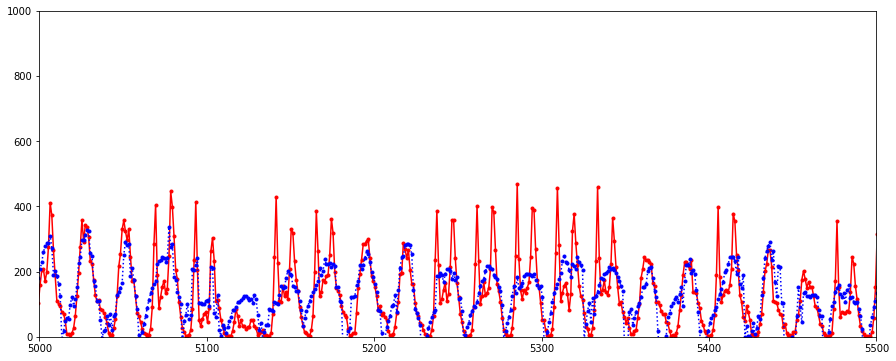

In [206]:
#BIKE DATASET
dataset = "train_bikeDemand.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])
raw.drop(raw.columns[0], axis=1,inplace=True)


y = raw["count"].to_numpy()
raw.drop(["count"],inplace=True,axis=1)
X = raw.to_numpy()

n_batch = 300

oselmr = OSELMRegressor(n_hidden=n_batch, activation_func='sigmoid', random_state=123)

min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

# Fit model with chunks of data
for i in range(29):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.xlim([5000,5500])
plt.ylim([0,1000])
display(raw)

print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))

Text(0.5, 1.0, 'R2 Score vs Batch training size on Bike Dataset')

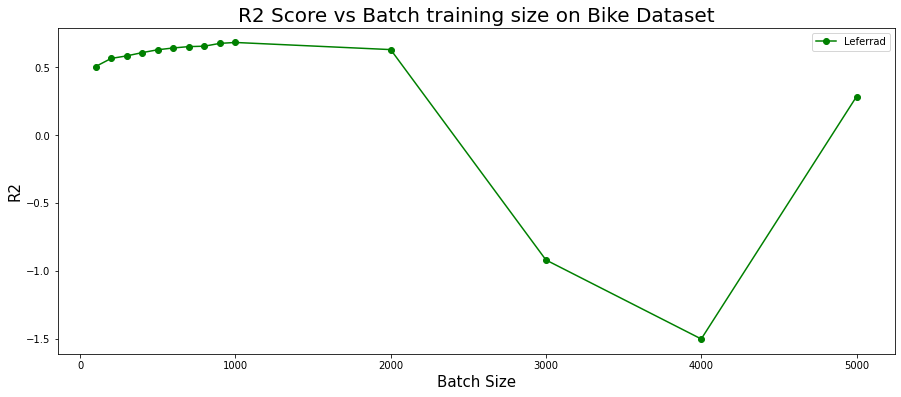

In [196]:
nb = []
r2 = []
batches = [100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000]

for b in batches:
    r2.append(LeferradOSELM(b,X,y))
    nb.append(b)
    
plt.figure(figsize=(15,6))
r2Plot,=plt.plot(nb,r2,label='Leferrad',color='green',marker='o')
plt.ylabel('R2',fontsize=15)
plt.xlabel('Batch Size',fontsize=15)
#predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.legend(handles=[r2Plot])
plt.title("R2 Score vs Batch training size on Bike Dataset",fontsize=20,fontweight=40)

3512 879 4391


,day,month,year
0,2,7,2010
1,2,7,2010
2,2,7,2010
3,2,7,2010
4,2,7,2010
...,...,...,...
4386,31,12,2010
4387,31,12,2010
4388,31,12,2010
4389,31,12,2010


Train score for batch 1: 0.13674168980221457
Train score for batch 2: 0.038779580368551336
Train score for batch 3: 0.07465740659811093
Train score for batch 4: 0.06225548909902667
Train score for batch 5: 0.02429146203764887
Train score for batch 6: 0.041627736718934605
Train score for batch 7: 0.040479622992898534
Train score for batch 8: 0.03195571608582504
Train score for batch 9: 0.04305653453492109
Train score for batch 10: 0.022717612977592117
Train score for batch 11: 0.012754293789948523
Train score of total: 0.03255080472354477
Test score of total: 0.027346047116642125

4391


,day,month,year
0,2,7,2010
1,2,7,2010
2,2,7,2010
3,2,7,2010
4,2,7,2010
...,...,...,...
4386,31,12,2010
4387,31,12,2010
4388,31,12,2010
4389,31,12,2010


MSRE = 19.317212150371358
R2 = 0.03218307440557311
MAPE = 1.495500357869917


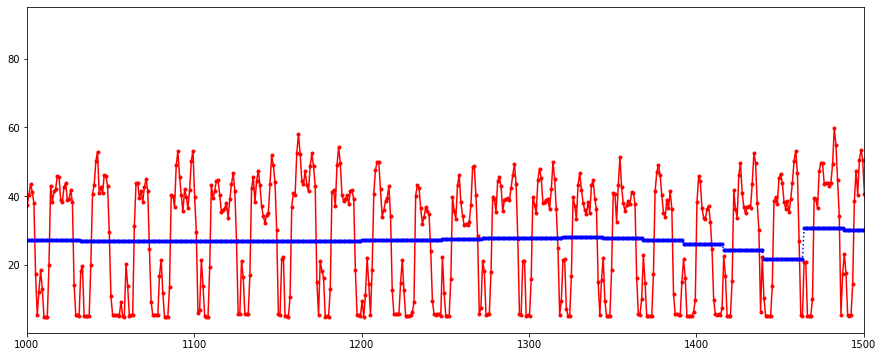

In [207]:
#REC CENTER DATASET
dataset = "rec-center-hourly.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1,2])

raw["day"] = [t.day for t in pd.DatetimeIndex(raw.timestamp)]
raw["month"] = [t.month for t in pd.DatetimeIndex(raw.timestamp)]
raw['year'] = [t.year for t in pd.DatetimeIndex(raw.timestamp)]


y = raw["kw_energy_consumption"].to_numpy()
raw.drop(["timestamp","kw_energy_consumption"],inplace=True,axis=1)
X = raw.to_numpy()

n_batch = 320

oselmr = OSELMRegressor(n_hidden=n_batch, activation_func='sigmoid', random_state=123)

min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train),len(X_test),len(X))

display(raw)

# Fit model with chunks of data
for i in range(11):
    X_batch = X_train[i*n_batch:(i+1)*n_batch]
    y_batch = y_train[i*n_batch:(i+1)*n_batch]
    oselmr.fit(X_batch, y_batch)
    print("Train score for batch %i: %s" % (i+1, str(oselmr.score(X_batch, y_batch))))

# Results
print("Train score of total: %s" % str(oselmr.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmr.score(X_test, y_test)))  
print("")

pred = oselmr.predict(X)

time = np.linspace(0,len(X),len(X))
print(len(time))

plt.figure(figsize=(15,6))
targetPlot,=plt.plot(time,y,label='target',color='red',marker='.',linestyle='-')
predictedPlot,=plt.plot(time,pred,label='predicted',color='blue',marker='.',linestyle=':')
plt.xlim([1000,1500])
#plt.ylim([0,1000])
display(raw)

print("MSRE =",mean_squared_error(y, pred, squared=False))
print("R2 =",r2_score(y, pred))
print("MAPE =",mean_absolute_percentage_error(y, pred))